# Exploratory Data Analysis (EDA) for Credit Risk Model

This notebook explores the Xente dataset to understand its structure, distributions, correlations, missing values, and outliers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 1. Overview of the Data
Understand the structure: rows, columns, and data types.

In [4]:
print(f'Dataset Shape: {df.shape}')
print('\nData Types:\n', df.dtypes)
df.info()

Dataset Shape: (95662, 16)

Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId   

## 2. Summary Statistics
Compute central tendency, dispersion, and shape for numerical features.

In [5]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## 3. Distribution of Numerical Features
Visualize distributions of 'Amount' and 'Value' to identify patterns and outliers.

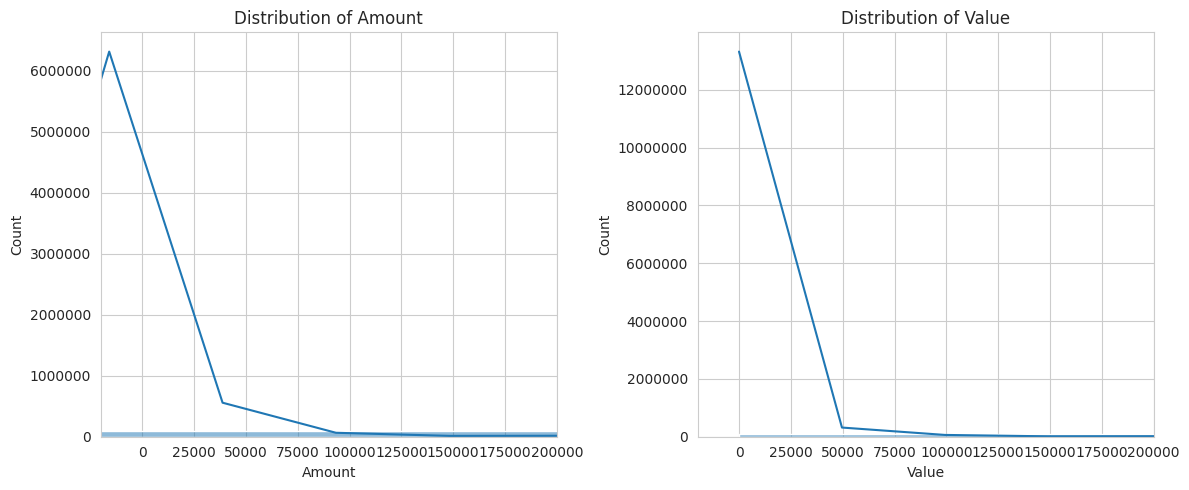

In [28]:
plt.figure(figsize=(12, 5))

# Plot 1: Amount Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=2, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.xlim(-20000, 200000)


# Plot 2: Value Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Value'], bins=2, kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Count')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation\
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
plt.xlim(-20000, 200000)



plt.tight_layout()
plt.show()

## 4. Box Plots for Outliers
Identify outliers in 'Amount' and 'Value'.

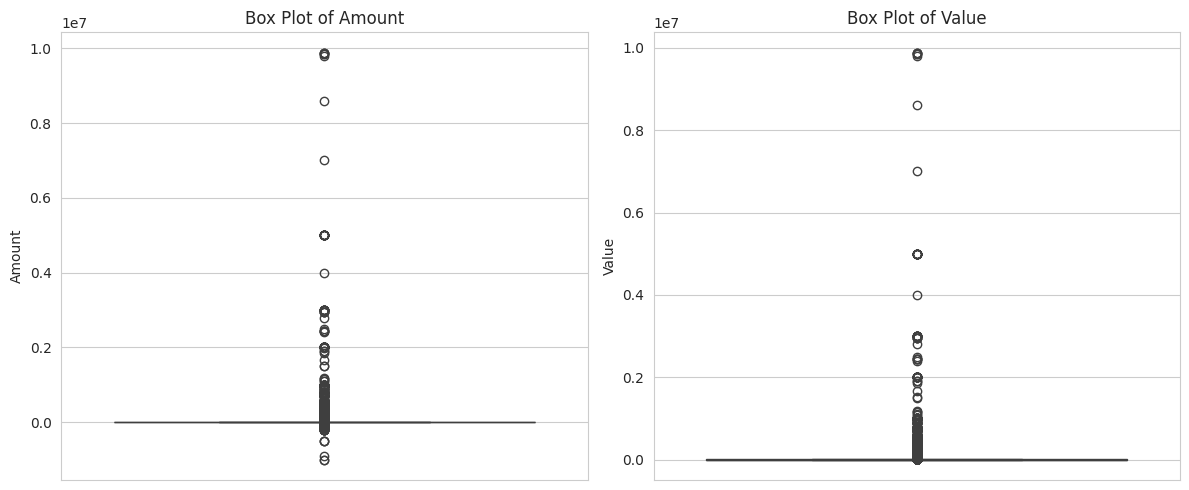

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Amount'])
plt.title('Box Plot of Amount')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Value'])
plt.title('Box Plot of Value')

plt.tight_layout()
plt.show()

## 5. Distribution of Categorical Features
Analyze frequency of categories in 'ProductCategory' and 'ChannelId'.

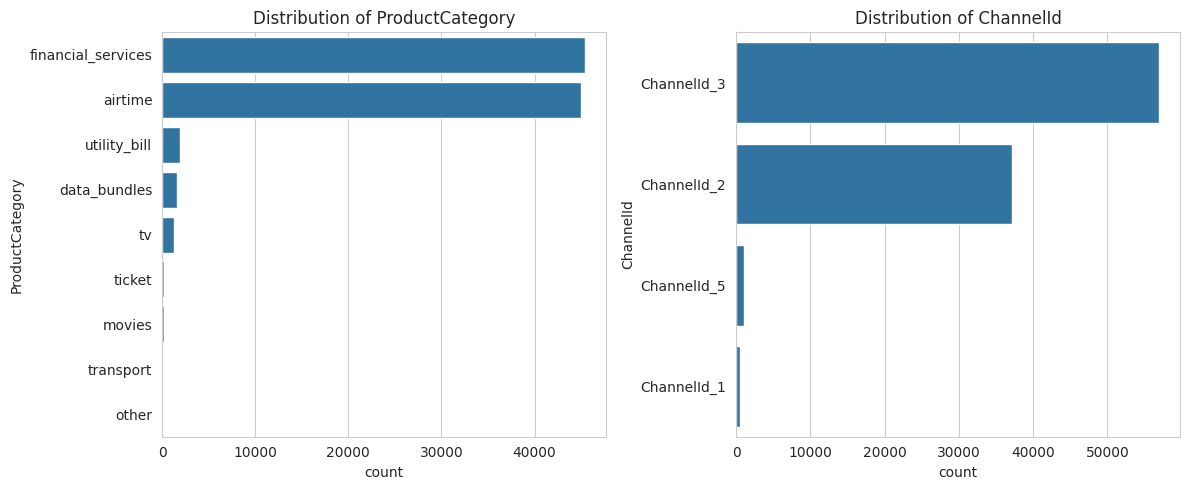

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(y=df['ProductCategory'], order=df['ProductCategory'].value_counts().index)
plt.title('Distribution of ProductCategory')

plt.subplot(1, 2, 2)
sns.countplot(y=df['ChannelId'], order=df['ChannelId'].value_counts().index)
plt.title('Distribution of ChannelId')

plt.tight_layout()
plt.show()

## 6. Correlation Analysis
Examine relationships between numerical features.

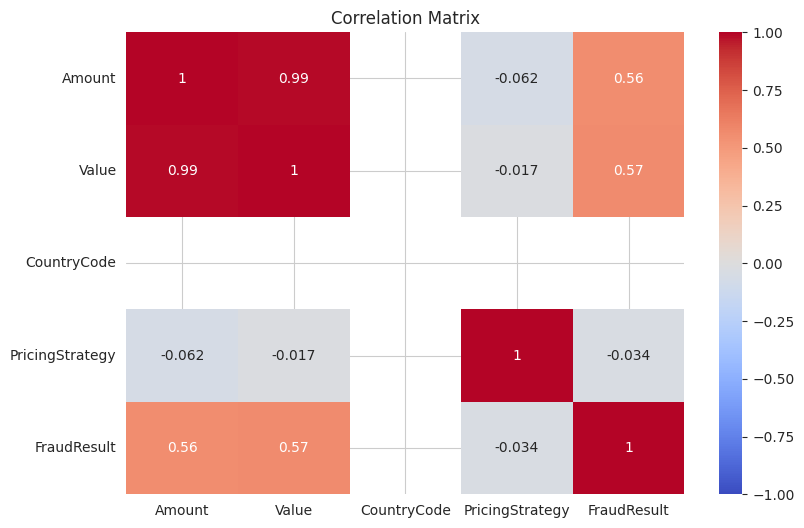

In [11]:
numerical_cols = ['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 7. Missing Values
Identify and quantify missing data.

In [12]:
missing_values = df.isnull().sum()
print('Missing Values:\n', missing_values[missing_values > 0])

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print('\nPercentage of Missing Values:\n', missing_percent[missing_percent > 0])

Missing Values:
 Series([], dtype: int64)

Percentage of Missing Values:
 Series([], dtype: float64)


## 8. Key Insights
Based on the EDA, here are 5 key insights to guide feature engineering:
1. **Highly Skewed Numerical Features with Negative Values**: Both `Amount` and `Value` are heavily right-skewed, with medians around 1,000 but maxima near 9.88M and minima at -1M (representing refunds or credits). Log-transformation after handling negatives (e.g., using absolute values or separate debit/credit features) is recommended.
2. **Dominant Product Categories**: `ProductCategory` is dominated by “financial_services” and “airtime,” with other categories like “utility_bill” much less frequent. One-hot encoding is suitable, with grouping of rare categories into “Other” advised to reduce sparsity.
3. **No Missing Data**: All 95,662 rows have complete data across 16 columns, eliminating the need for imputation.
4. **Complementary but Highly Correlated Amount and Value**: The correlation between `Amount` and `Value` is near -0.99 due to `Value` being the absolute of `Amount`. Both features carry distinct information — `Amount` reflects net transaction flow (positive or negative), while `Value` shows transaction size regardless of direction. Consider keeping both and creating derived features (e.g., debit/credit flags or ratios) for modeling.
5. **Significant Outliers**: `Amount` and `Value` contain extreme outliers ranging from -1M to ~9.88M. Capping (e.g., at 1.5× IQR) or Winsorization, especially for refunds and credits, is advised to reduce skewness and improve model robustness.


In [29]:
# Filter rows where Amount != 0 but Value == 0
mismatch_rows = df[(df['Amount'] != 0) & (df['Value'] == 0)]

# Show the result
print(mismatch_rows)


Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []
